In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

from Scripts import simulation_CLI as cleo

In [48]:
for unitary_seed in range(5):
    initial_pops = [0.2,.2,.2, .2, .4, .2, .2, .2]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c5"
    unitary_energy_subspace = 1
    ordering_seed = 1
    chunk_size = 2
    order_rule_name = "landscape_maximizes"
    num_steps = 50
    data = cleo.execute(file_name="landscape_maximizes",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="unitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

90%
simulation complete, extracting and saving data to : ../data/landscape_maximizes/landscape_maximizes-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_landscape_maximizes
simulation complete, extracting and saving data to : ../data/landscape_maximizes/landscape_maximizes-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_landscape_maximizes
simulation complete, extracting and saving data to : ../data/landscape_maximizes/landscape_maximizes-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_landscape_maximizes
90%
simulation complete, extracting and saving data to : ../data/landscape_maximizes/landscape_maximizes-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_landscape_maximizes
simulation complete, extracting and saving data to : ../data/landscape_maximizes/landscape_maximizes-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_na

In [52]:
for unitary_seed in range(5):
    initial_pops = [0.2,.2,.2, .2, .4, .2, .2, .2]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c5"
    unitary_energy_subspace = 1
    ordering_seed = 1
    chunk_size = 2
    order_rule_name = "greedy"
    num_steps = 50
    data = cleo.execute(file_name="greedy",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="unitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_greedy
90%
simu

In [81]:
for unitary_seed in range(5):
    initial_pops = [0.2,0.2,0.2,.2,.2, .2, .4, .2, .2, .2,0.2,0.2]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c5"
    unitary_energy_subspace = 1
    ordering_seed = 1
    chunk_size = 2
    order_rule_name = "random"
    num_steps = 50
    data = cleo.execute(file_name="random",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="unitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

KeyboardInterrupt: 

In [54]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/landscape_maximizes")

In [55]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [56]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [57]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM


In [58]:
newdata1 = dict(h5py.File("../data/random/random.hdf5"))
newdata2 = dict(h5py.File("../data/greedy/greedy.hdf5"))
newdata3 = dict(h5py.File("../data/landscape_maximizes/landscape_maximizes.hdf5"))

In [59]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_3_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(3)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit triplet
    #dimension 3 and 4 is the 3 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['three_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [60]:
popsrandom = get_pops(newdata1,8,"c5","random")
popsgreedy = get_pops(newdata2,8,"c5","greedy")
popsland_max = get_pops(newdata3,8,"c5","landscape_maximizes")

In [61]:
# generate exractable work and change in extractable work data for greedy
sizes = [8]
connectivities = ["c5"]
temps = ['cold','hot']
result = {s:{t:{} for t in temps} for s in sizes}
for size in sizes:
    for connectivity in connectivities:
        pops = get_pops(newdata3,size,connectivity,"landscape_maximizes")
        extractable_work_land_maz = np.array([[measure.extractable_work_of_each_qubit_from_pops(p) for p in time_slice ]for time_slice in pops ])
        change_in_ex_work_land_maz = np.diff(extractable_work_land_maz,axis = 1)

In [62]:
# generate exractable work and change in extractable work data for greedy
sizes = [8]
connectivities = ["c5"]
temps = ['cold','hot']
result = {s:{t:{} for t in temps} for s in sizes}
for size in sizes:
    for connectivity in connectivities:
        pops = get_pops(newdata2,size,connectivity,"greedy")
        extractable_work_greedy = np.array([[measure.extractable_work_of_each_qubit_from_pops(p) for p in time_slice ]for time_slice in pops ])
        change_in_ex_work_greedy = np.diff(extractable_work_greedy,axis = 1)

In [63]:
sizes = [8]
connectivities = ["c5"]
temps = ['cold','hot']
result = {s:{t:{} for t in temps} for s in sizes}
for size in sizes:
    for connectivity in connectivities:
        pops = get_pops(newdata1,size,connectivity,"random")
        extractable_work_random = np.array([[measure.extractable_work_of_each_qubit_from_pops(p) for p in time_slice ]for time_slice in pops ])
        change_in_ex_work_random = np.diff(extractable_work_random,axis = 1)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def plot_stats_2d_lists(list1, list2):
    # Calculate statistics for list1
    list1_mean = np.mean(list1)
    list1_median = np.median(list1)
    list1_mode = stats.mode(list1.flatten())[0][0]
    list1_std = np.std(list1)
    
    # Calculate statistics for list2
    list2_mean = np.mean(list2)
    list2_median = np.median(list2)
    list2_mode = stats.mode(list2.flatten())[0][0]
    list2_std = np.std(list2)
    
    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    
    # Plot mean
    axes[0, 0].bar(['List 1', 'List 2'], [list1_mean, list2_mean], color=['blue', 'orange'])
    axes[0, 0].set_title('Mean')
    
    # Plot median
    axes[0, 1].bar(['List 1', 'List 2'], [list1_median, list2_median], color=['blue', 'orange'])
    axes[0, 1].set_title('Median')
    
    # Plot mode
    axes[1, 0].bar(['List 1', 'List 2'], [list1_mode, list2_mode], color=['blue', 'orange'])
    axes[1, 0].set_title('Mode')

    
    # Plot standard deviation
    axes[1, 1].bar(['List 1', 'List 2'], [list1_std, list2_std], color=['blue', 'orange'])
    axes[1, 1].set_title('Standard Deviation')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [65]:
# Initialize an empty 2D array to store mean and std
mean_std_array = []

# Loop through each sim_index
for sim_index in popsgreedy:
    # Create an empty list to store mean and std for this sim_index
    sim_mean_std = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        listr = []
        # appending all the values in the list
        for value in time_step.values():
            listr.append(value)
        # calculating standard deviation using np.std
        stds = np.std(listr)
        means = np.mean(listr)
        
        # Append mean and std to the list for this time step
        sim_mean_std.append([means, stds])
    
    # Append the list for this sim_index to the 2D array
    mean_std_array.append(sim_mean_std)

# Convert the list of lists to a numpy array
mean_std_array = np.array(mean_std_array)

# Extract standard deviation and mean values for each simulation
stds_greedy = mean_std_array[:, :, 1]
means_greedy = mean_std_array[:, :, 0]

# Create x-axis values (time steps)
time_steps = np.arange(1, stds_greedy.shape[1] + 1)

# Plot standard deviation for each simulation
plt.figure(figsize=(10, 5))
for sim_idx in range(len(stds_greedy)):
    plt.plot(time_steps, stds_greedy[sim_idx], '-o', label=f'Sim {sim_idx + 1} Std')

plt.xlabel('Time Step')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation Over Time')
plt.legend()
filename = f"SD_MI_different_greedy_all_sim_index.png"
plt.savefig(filename)
plt.grid(True)
plt.show()

# Plot mean for each simulation
plt.figure(figsize=(10, 5))
for sim_idx in range(len(means_greedy)):
    plt.plot(time_steps, means_greedy[sim_idx], '--', label=f'Sim {sim_idx + 1} Mean')

plt.xlabel('Time Step')
plt.ylabel('Mean')
plt.title('Mean Over Time')
plt.legend()
filename = f"Mean_MI_different_greedy_all_sim_index.png"
plt.savefig(filename)
plt.grid(True)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [66]:
def means_stds_mode_of_pops_of_one_sim_index(pops,trial_index):
    mean_stds_mode_list = []
    for step_index in range(steps):
        total = sum(pops[trial_index][step_index])
        stds = np.std(pops[trial_index][step_index])
        means = np.mean(pops[trial_index][step_index])
        mode = max(pops[trial_index][step_index])
        mean_stds_mode_list.append([total,stds,means,mode])
    return mean_stds_mode_list

In [68]:
steps = 49
#plot 2 lists a function of time
def plot_lists_as_function_of_time(list1, list2):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
    # Plotting the lists
    plt.plot(time_steps, list1, label='list1')
    plt.plot(time_steps, list2, label='list2')

    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title('shift vector for the qubits as a function of Time Step')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.show()

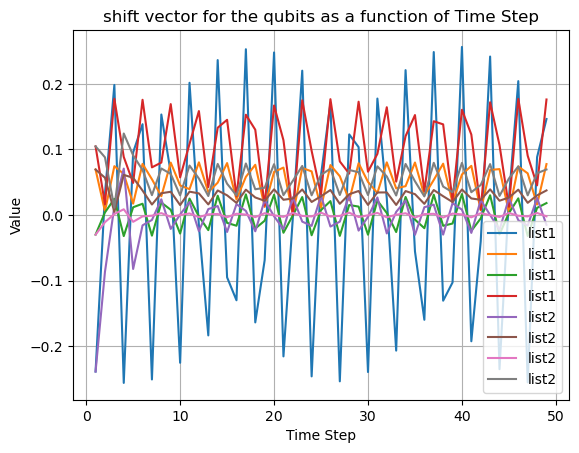

In [69]:
plot_lists_as_function_of_time(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_land_maz,0),means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_greedy,0))


In [70]:
def extract_total(list_of_lists):
    return [sublist[0] for sublist in list_of_lists]
def extract_stds(list_of_lists):
    return [sublist[1] for sublist in list_of_lists]
def extract_means(list_of_lists):
    return [sublist[2] for sublist in list_of_lists]
def extract_mode(list_of_lists):
    return [sublist[3] for sublist in list_of_lists]

In [75]:
steps = 49
#plot 2 lists a function of time
def plot_total_as_function_of_time(list1, list2,list3):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
    # Plotting the lists
    plt.plot(time_steps, list1, label='list1')
    plt.plot(time_steps, list2, label='list2')
    plt.plot(time_steps, list3, label='list3')


    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title('Total \Delta W on landscape as a function of Time Step')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.show()

def plot_stds_Delta_Wex_as_function_of_time(list1, list2,list3):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
    # Plotting the lists
    plt.plot(time_steps, list1, label='list1')
    plt.plot(time_steps, list2, label='list2')
    plt.plot(time_steps, list3, label='list3')
    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title('Standard deviation of \Delta W on landscape as a function of Time Step')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.show()
def plot_means_Delta_Wex_as_function_of_time(list1, list2,list3):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
    # Plotting the lists
    plt.plot(time_steps, list1, label='list1')
    plt.plot(time_steps, list2, label='list2')
    plt.plot(time_steps, list3, label='list3')
    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title('Mean \Delta W on landscape as a function of Time Step')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.show()
def plot_mode_Delta_Wex_as_function_of_time(list1, list2,list3):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
    # Plotting the lists
    plt.plot(time_steps, list1, label='list1')
    plt.plot(time_steps, list2, label='list2')
    plt.plot(time_steps, list3, label='list3')

    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title('Mode of \Delta W on landscape as a function of Time Step')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.show()

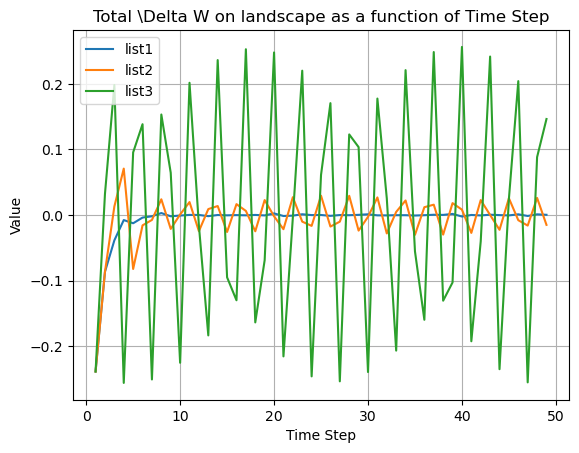

In [76]:
tot_greedy=extract_total(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_greedy,0))
tot_land_max=extract_total(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_land_maz,0))
tot_random =extract_total(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_random,0))
plot_total_as_function_of_time(tot_random,tot_greedy,tot_land_max)

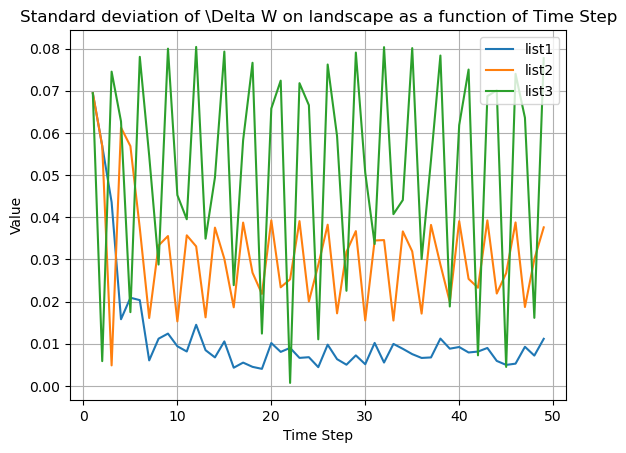

In [77]:
stds_greedy=extract_stds(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_greedy,0))
stds_land_max=extract_stds(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_land_maz,0))
stds_random =extract_stds(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_random,0))
plot_stds_Delta_Wex_as_function_of_time(stds_random,stds_greedy,stds_land_max)

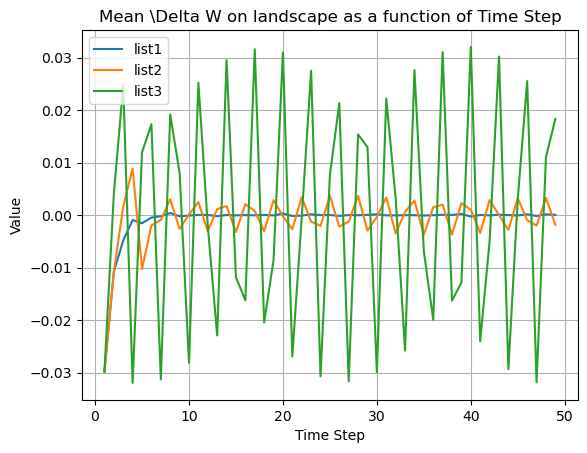

In [78]:
means_greedy=extract_means(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_greedy,0))
means_land_max=extract_means(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_land_maz,0))
means_random =extract_means(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_random,0))
plot_means_Delta_Wex_as_function_of_time(means_random,means_greedy,means_land_max)

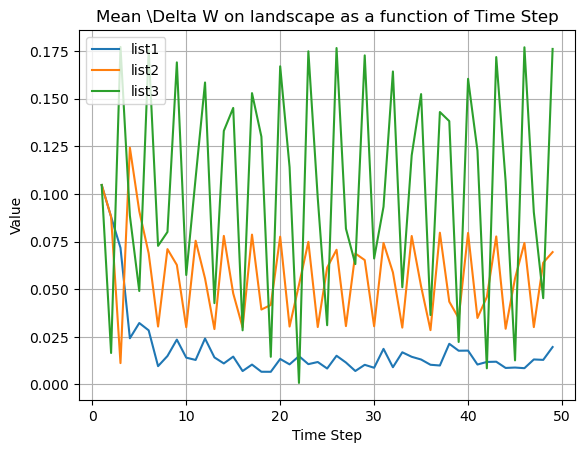

In [79]:
mode_greedy=extract_mode(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_greedy,0))
mode_land_max=extract_mode(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_land_maz,0))
mode_random =extract_mode(means_stds_mode_of_pops_of_one_sim_index(change_in_ex_work_random,0))
plot_means_Delta_Wex_as_function_of_time(mode_random,mode_greedy,mode_land_max)

In [100]:
def count_positive_steps(list_of_lists, index):
    total_positive_steps = 0
    consecutive_positive_steps = 0
    consecutive_lengths = []  # List to store lengths of consecutive positive sequences
    
    for lst in list_of_lists:
        if lst[index] > 0:
            total_positive_steps += 1
            consecutive_positive_steps += 1
        else:
            consecutive_lengths.append(consecutive_positive_steps)  # Record length of consecutive positive sequence
            consecutive_positive_steps = 0  # Reset consecutive count if value becomes non-positive
            
    # Add the last consecutive count if the list ends with a positive value
    if consecutive_positive_steps > 0:
        consecutive_lengths.append(consecutive_positive_steps)
        
    return total_positive_steps, consecutive_lengths


In [114]:
change_in_ex_work_greedy[0][0:99]

array([[-4.88632611e-01, -2.83399322e-01, -6.81959576e-02,
        -8.31190525e-02,  2.33856200e-01,  2.00083149e-02,
         1.10423992e-01, -4.32770407e-02],
       [ 7.46576969e-02, -1.28596002e-01, -1.41948135e-01,
         8.61799883e-02, -1.73850388e-01,  1.05489018e-01,
        -1.17291417e-01,  5.29024794e-02],
       [ 1.26672734e-02, -4.58043911e-03, -5.49713199e-03,
         1.38632309e-02, -6.74407152e-03,  1.69607101e-02,
        -2.40221821e-03,  1.20373253e-02],
       [-8.71728720e-02,  1.31486378e-01,  1.45601075e-01,
        -9.97883195e-02,  1.78329381e-01, -1.22141031e-01,
         1.18003341e-01, -6.50897483e-02],
       [ 6.23360606e-02, -1.21139815e-01, -1.33378411e-01,
         7.25733055e-02, -1.63336920e-01,  8.88501371e-02,
        -1.11902700e-01,  4.17290431e-02],
       [ 3.75390728e-02, -1.38567483e-02, -1.65964414e-02,
         4.10957980e-02, -2.03568292e-02,  5.02820365e-02,
        -7.40466104e-03,  3.56241865e-02],
       [-9.93906119e-02,  1.300671

In [115]:
count_positive_steps(change_in_ex_work_random[0][0:99],0)

(49,
 [0,
  0,
  0,
  3,
  0,
  0,
  4,
  0,
  1,
  2,
  1,
  2,
  0,
  1,
  2,
  0,
  0,
  0,
  1,
  0,
  2,
  0,
  0,
  0,
  1,
  1,
  1,
  2,
  5,
  0,
  1,
  3,
  1,
  3,
  0,
  0,
  0,
  1,
  3,
  2,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  1,
  2,
  1])

In [89]:
change_in_ex_work_greedy[0][0:99]

array([[-4.88632611e-01, -2.83399322e-01, -6.81959576e-02,
        -8.31190525e-02,  2.33856200e-01,  2.00083149e-02,
         1.10423992e-01, -4.32770407e-02],
       [ 7.46576969e-02, -1.28596002e-01, -1.41948135e-01,
         8.61799883e-02, -1.73850388e-01,  1.05489018e-01,
        -1.17291417e-01,  5.29024794e-02],
       [ 1.26672734e-02, -4.58043911e-03, -5.49713199e-03,
         1.38632309e-02, -6.74407152e-03,  1.69607101e-02,
        -2.40221821e-03,  1.20373253e-02],
       [-8.71728720e-02,  1.31486378e-01,  1.45601075e-01,
        -9.97883195e-02,  1.78329381e-01, -1.22141031e-01,
         1.18003341e-01, -6.50897483e-02],
       [ 6.23360606e-02, -1.21139815e-01, -1.33378411e-01,
         7.25733055e-02, -1.63336920e-01,  8.88501371e-02,
        -1.11902700e-01,  4.17290431e-02],
       [ 3.75390728e-02, -1.38567483e-02, -1.65964414e-02,
         4.10957980e-02, -2.03568292e-02,  5.02820365e-02,
        -7.40466104e-03,  3.56241865e-02],
       [-9.93906119e-02,  1.300671

In [82]:
twoQdmsrandom = get_2_qbit_dms(newdata1,8,"c5","random")
twoQdmsgreedy = get_2_qbit_dms(newdata2,8,"c5","greedy")
twoQdmslandmax = get_2_qbit_dms(newdata3,8,"c5","landscape_maximizes")

In [83]:
#MI of every pair
def mutual_info_dicts(twoQdms, trial_index):
    mutual_info_list = []
    for time_step in twoQdms[trial_index]:
        mutual_info_dict = {}
        mutual_info = measure.mutual_information_of_every_pair_dict(time_step)
        # Filter out values below the precision threshold
        filtered_mutual_info = {k: v if v >= 1e-6 else 0 for k, v in mutual_info.items()}
        # Update the mutual_info_dict with the filtered mutual info for the current time step
        mutual_info_dict.update(filtered_mutual_info)
        # Append the mutual_info_dict to the list
        mutual_info_list.append(mutual_info_dict)
    return mutual_info_list

In [87]:
num_nodes =8 
adj_matrices_list_greedy = np.array(adjacency_matrices_list_two_dim(twoQdmsgreedy,3, num_nodes,mutual_info_dicts))
adj_matrices_list_random = np.array(adjacency_matrices_list_two_dim(twoQdmsrandom,3, num_nodes,mutual_info_dicts))
adj_matrices_list_land_max = np.array(adjacency_matrices_list_two_dim(twoQdmslandmax,3, num_nodes,mutual_info_dicts))

In [85]:
# Call the two_point_dict function for each trial index
# Get the list of dictionaries containing two point values for each time step
def create_adjacency_matrix_two_dim(two_point_dict, num_nodes):
    adjacency_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    for (node1, node2), two_point_value in two_point_dict.items():
        adjacency_matrix[node1][node2] = two_point_value
        adjacency_matrix[node2][node1] = two_point_value  # Assuming undirected graph
    return adjacency_matrix

In [86]:
def adjacency_matrices_list_two_dim(twoQdms, trial_index, num_nodes, two_point_dicts):
    # Get the list of dictionaries containing mutual information values for each time step
    two_point_dicts_list = two_point_dicts(twoQdms, trial_index)
    # Create adjacency matrices for each time step
    adjacency_matrices = []
    for two_point_dict in two_point_dicts_list:
        adj_matrix = create_adjacency_matrix_two_dim(two_point_dict, num_nodes)
        adjacency_matrices.append(adj_matrix)
    return adjacency_matrices

In [88]:
def clustering_coeff_function_of_time(adjacency_matrix_list):
    C_list = []
    for adj_mat in adjacency_matrix_list:
        M_sq = adj_mat@adj_mat
        sum_of_M_sq = np.sum(M_sq)
        M_cube = adj_mat@adj_mat@adj_mat
        M_cube_trace = np.trace(M_cube)
        C_list.append(M_cube_trace/sum_of_M_sq)
    return(C_list)

In [89]:
Clustering_greedy = clustering_coeff_function_of_time(adj_matrices_list_greedy)
Clustering_random = clustering_coeff_function_of_time(adj_matrices_list_random)
Clustering_land_max = clustering_coeff_function_of_time(adj_matrices_list_land_max)

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_1025/1789844759.py:8: RuntimeWarning: invalid value encountered in scalar divide
  C_list.append(M_cube_trace/sum_of_M_sq)


In [90]:
def disparity_function_of_time(adjacency_matrix_list, N):
    D_list = []
    for adj_mat in adjacency_matrix_list:
        M_row_sum_squared = np.sum(adj_mat, axis=1)**2
        M_row_sum_of_squared_elements = np.sum(adj_mat**2, axis=1)
        # Check for zero division before performing divisions
        Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)
        D_list.append(np.sum(Di) / N)
    return D_list

In [91]:
Disparity_random=disparity_function_of_time(adj_matrices_list_random,8)
Disparity_greedy=disparity_function_of_time(adj_matrices_list_greedy,8)
Disparity_land_max=disparity_function_of_time(adj_matrices_list_land_max,8)

/var/folders/x8/hv6lnsx5209d4m84b842j095n23ctf/T/ipykernel_1025/1155872977.py:7: RuntimeWarning: invalid value encountered in divide
  Di = np.where(M_row_sum_squared != 0, M_row_sum_of_squared_elements / M_row_sum_squared, 0)


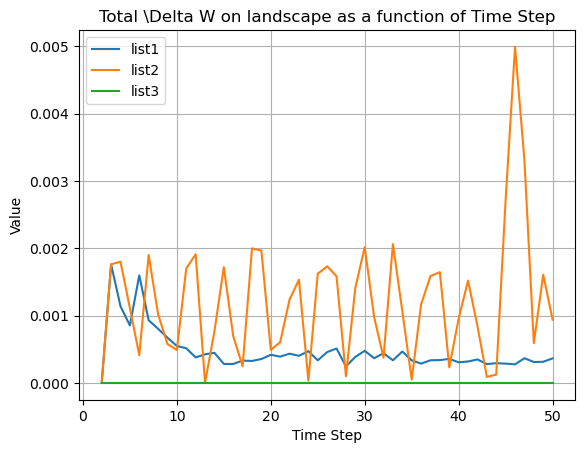

In [93]:
plot_total_as_function_of_time(Clustering_random,Clustering_greedy,Clustering_land_max)

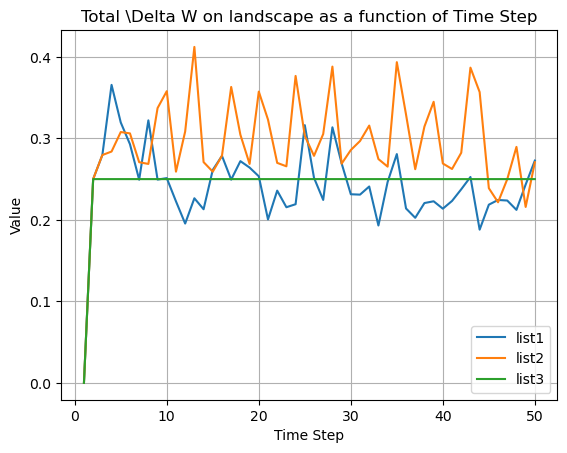

In [99]:
plot_total_as_function_of_time(Disparity_random,Disparity_greedy,Disparity_land_max)

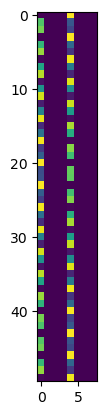

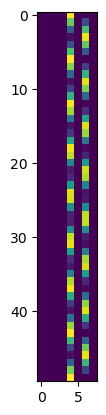

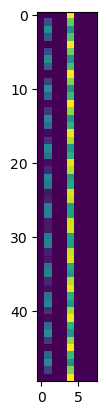

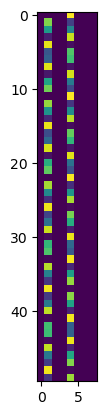

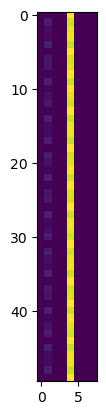

In [98]:
for i in range(5):
    plt.imshow(popsland_max[i], interpolation='none')
    plt.show()